In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [128]:
data = pd.read_csv("pedestrian.csv")

In [129]:
data.head()

,Date,Hour,State Library,Collins Place (South),Collins Place (North),Flagstaff Station,Melbourne Central,Town Hall (West),Bourke Street Mall (North),Bourke Street Mall (South),...,Queen Street (West),Lygon Street (East),Flinders St-Swanston St (West),Spring St-Lonsdale St (South),City Square,St. Kilda-Alexandra Gardens,Grattan St-Swanston St (West),Monash Rd-Swanston St (West),Tin Alley-Swanston St (West),Southbank
0,01/01/2016,0:00:00,1535,0,409,785,2829,3044,461,883,...,613,175,3681,582,2536,0,36,15,16,NaN
1,01/01/2016,1:00:00,1442,0,200,313,2905,2908,430,597,...,436,92,4511,129,2606,0,37,36,30,NaN
2,01/01/2016,2:00:00,747,0,96,116,1733,2036,195,294,...,314,49,4311,66,2200,0,11,7,11,NaN
3,01/01/2016,3:00:00,352,0,48,85,1214,1162,161,183,...,244,42,3638,39,1437,0,15,3,1,NaN
4,01/01/2016,4:00:00,109,0,12,40,357,657,90,118,...,66,23,2604,30,448,0,10,7,4,NaN


In [130]:
data.shape

(17544, 45)

In [131]:
df = data.iloc[:,0:3]
df.head(50)

,Date,Hour,State Library
0,01/01/2016,0:00:00,1535
1,01/01/2016,1:00:00,1442
2,01/01/2016,2:00:00,747
3,01/01/2016,3:00:00,352
4,01/01/2016,4:00:00,109
5,01/01/2016,5:00:00,65
6,01/01/2016,6:00:00,52
7,01/01/2016,7:00:00,67
8,01/01/2016,8:00:00,73
9,01/01/2016,9:00:00,142


In [132]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["Hour"] = pd.to_timedelta(df["Hour"])
df["Date"] = df['Date'] + df['Hour']
df = df.drop(columns=['Hour'])
df = df.set_index(['Date'])
df.head(30)

,State Library
Date,
2016-01-01 00:00:00,1535
2016-01-01 01:00:00,1442
2016-01-01 02:00:00,747
2016-01-01 03:00:00,352
2016-01-01 04:00:00,109
2016-01-01 05:00:00,65
2016-01-01 06:00:00,52
2016-01-01 07:00:00,67
2016-01-01 08:00:00,73


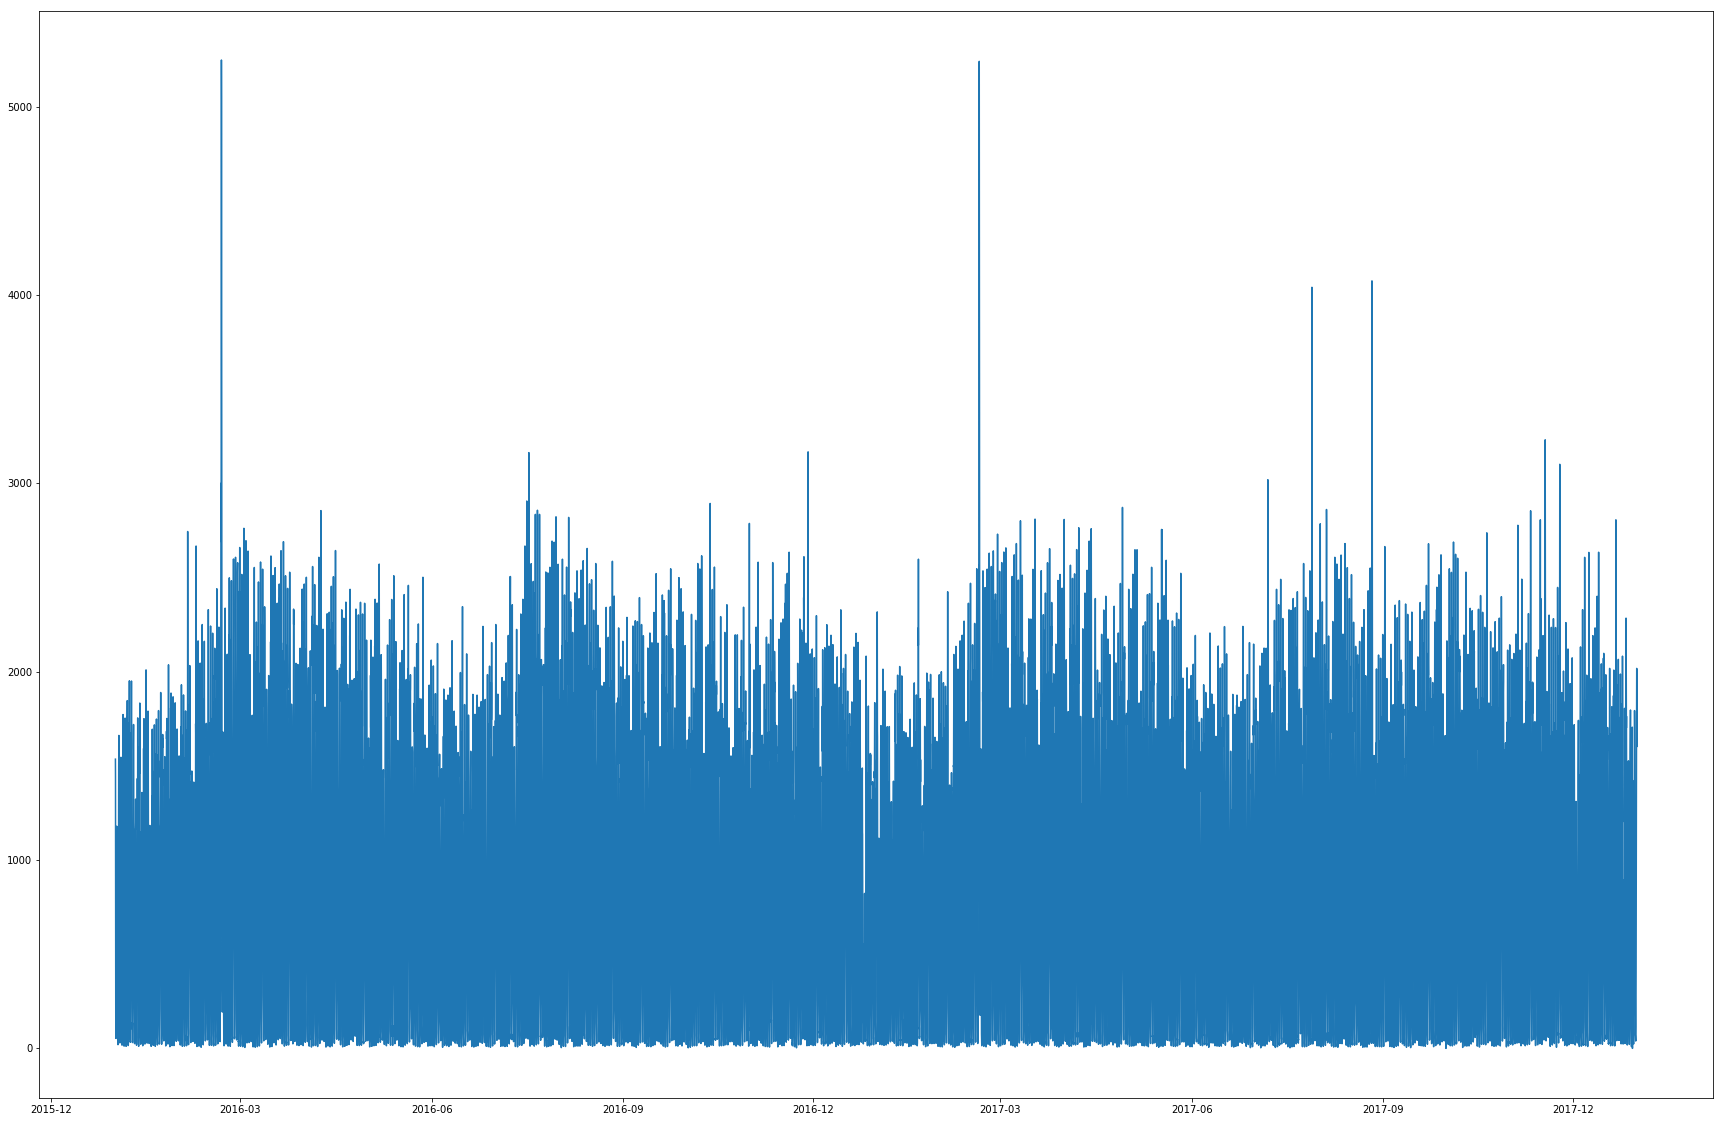

In [133]:
plt.figure(figsize=(30,20))
plt.plot(df)
plt.show()

In [ ]:
data_train = data.iloc[0:8000, 1:2].values
data_test = data.iloc[8000:, 1:2].values

In [ ]:
data_full = data.iloc[:, 1:2].values

In [ ]:
mm = MinMaxScaler(feature_range = (0,1))
training_scaled = mm.fit_transform(data_train)

In [ ]:
X_train = []
Y_train = []

lookback = 30

for i in range(lookback, len(training_scaled)):
    X_train.append(training_scaled[i-lookback:i,0])
    Y_train.append(training_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))